<a href="https://colab.research.google.com/github/sammainahkinya1404/Machine-Learning/blob/main/Teeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/teeth.jpeg')




In [12]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [13]:

# Apply adaptive histogram equalization filter to enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)



In [14]:
# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)


In [15]:
# Apply Hough transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 50)


In [16]:
# Draw the lines on the original image
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [17]:
# Calculate the angle of the lines and identify the gap between upper and lower teeth
angles = [theta for rho, theta in lines[0]]
median_angle = np.median(angles)
upper_gap_y = img.shape[0]//2
lower_gap_y = img.shape[0]//2
for rho, theta in lines[0]:
    angle = abs(theta - median_angle)
    if angle < np.pi/4:
        y = int(rho / np.sin(theta))
        if y < upper_gap_y:
            upper_gap_y = y
        elif y > lower_gap_y:
            lower_gap_y = y


In [18]:
# Draw the gap on the image
cv2.line(img, (0, upper_gap_y), (img.shape[1], upper_gap_y), (0, 255, 0), 2)
cv2.line(img, (0, lower_gap_y), (img.shape[1], lower_gap_y), (0, 255, 0), 2)

array([[[  6,   6,   6],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [172, 172, 172],
        [173, 173, 173],
        [174, 174, 174]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [172, 172, 172]],

       [[  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [164, 164, 164],
        [164, 164, 164],
        [165, 165, 165]],

       ...,

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]]

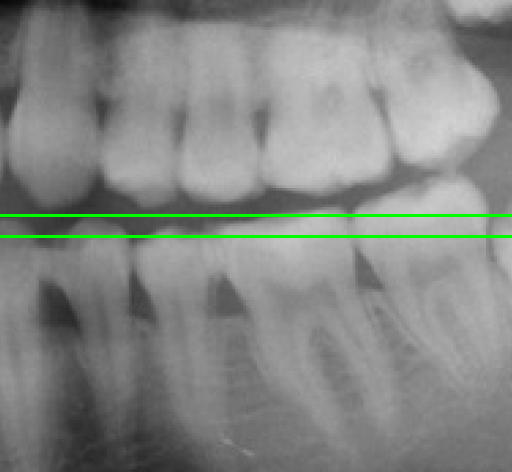

In [19]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)